# Root of equations

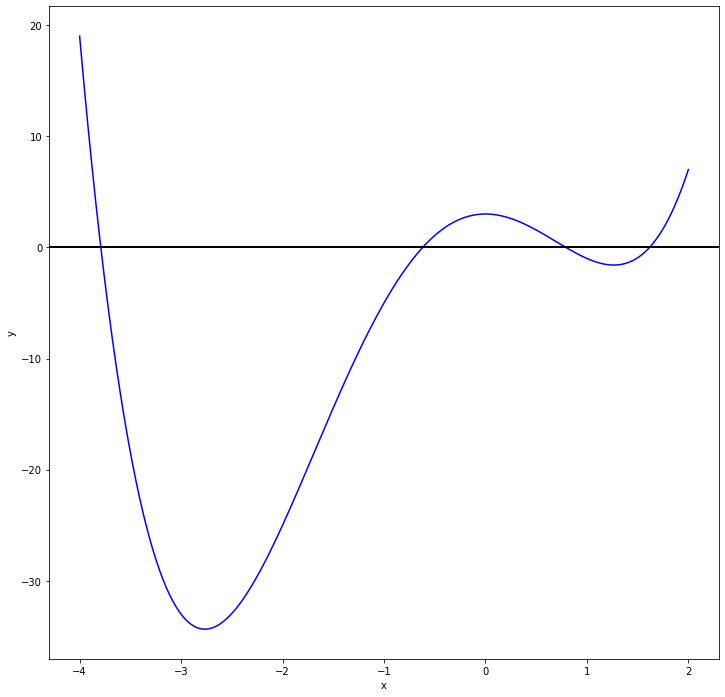

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def VisualInspection(ax, f, a, b, dx, **kwargs):
    x = np.arange(a,b+dx,dx)
    y = f(x)
    plt.plot(x, y, **kwargs)
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(0, color='black', lw=2)

def f(x): return x**4 + 2*x**3 -7*x**2 + 3
def f_sys(x): return x**4-8*x**2+1
    
fig, ax = plt.subplots(figsize=(12, 12))
VisualInspection(ax, f, -4, 2, 0.01, color="blue", linestyle="-")

dx = 1
x1,x2 = -1,-1

#print(x1,x2)
x1 = x2
x2 = x1 + dx
#print(x1,x2)



## Question 1

Implement the root search algorithm that we discussed during the lecture:

The algorithm should look for roots of $f(x)$ by looking for sign change in the function $f(x)$ over the interval $[a,b]$.  The algorithm is not meant to precisely identify the root value, but just to aproximately localize the root.

In otherwords, the algorithm should return the first interval $(x,x+dx)$ of size dx that contains a root of $f(x)$ over $[a,b]$ or None if there is no root on the domain

Use the algotithm to bracket all the real roots of $f(x) = x^4+2x^3-7x^2+3=0$ with an accuracy of 0.01

Hint: Determine the domain of the function from a visual inspection first



In [2]:
from numpy import sign
def rootsearch(f,a,b,dx):
    x1 = a    
    f1 = f(x1)    
    while(True):
        x2 = x1+dx
        f2 = f(x2)
        
        if(f1*f2<0):
            return (x1,x2)
        else:
            x1 = x2
            f1 = f2
            
        if(x2>b):
            return None  
        
        
a = -5
b = 2
dx = 0.01
while True:        
    rootbracket = rootsearch(f,a,b,dx)
    if(rootbracket):
        print(rootbracket)
        a = rootbracket[1]
    else:
        break
print("--------------")
def f(x): return x**4 + 2*x**3 -7*x**2 + 3
def df(x): return 4*x**3 + 6*x**2 -14*x
        
def newtonRaphson(f,df,a,b,tol=10**-9):
    #import error
    from numpy import sign
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    if sign(fa) == sign(fb): error.err('Root is not bracketed')
    x = 0.5*(a+b)
    for i in range(30):
        fx = f(x)
        if fx == 0.0: return x
        #Tighten the brackets on the root
        if sign(fa) != sign(fx): b = x
        else: a = x
        #Try a Netwton-Raphson step
        dfx = df(x)
        #try: dx = -fx/dfx
        #except ZeroDivisionError: dx = b - a
        dx = -fx/dfx
        x = x + dx
        #If the result is outside the brackets, use rootSearch
        if (b-x)*(x-a) < 0.0:
            (x1, x2) = rootsearch(f,a,b,(b-a)/2)
            x = (x1+x2)/2
        if abs(dx) < tol*max(abs(b),1.0): return x
    print('Too many iterations in Newton-Raphoson')
    

newtonRaphson(f,df,0,1,0.001)
import math

print(1/2 - math.sqrt(5)/2)
print(1/2 + math.sqrt(5)/2)
print(-3/2 - math.sqrt(21)/2)
print(-3/2 + math.sqrt(21)/2)

(-3.8000000000000256, -3.790000000000026)
(-0.6200000000000627, -0.6100000000000627)
(0.7899999999999382, 0.7999999999999382)
(1.6099999999999388, 1.6199999999999388)
--------------
-0.6180339887498949
1.618033988749895
-3.79128784747792
0.7912878474779199


## Question 2


Implement the bisection algorithm and use it in order to refine the location of the roots within their brackets.
We want an accuracy of 1e-8 on the root positions

How many iterations are necessary to achieve this precision?



In [3]:
from numpy import sign
import math
def bisection(f,x1,x2,tol=1.0e-9, printN=False):
    I = 0    
    f1 = f(x1)
    f2 = f(x2)
    while(np.abs(x2-x1)>tol):
        I+=1
        x3 = 0.5 * (x1+x2)
        f3 = f(x3)
        if(f1*f3<0):
            x2 = x3
            f2 = f3
        else:
            x1 = x3
            f1 = f3
    if(printN):print("number of iterations", I)
    return 0.5 * (x1+x2)

print(bisection(f, -3.80, -3.79, 1e-8, printN=True))
print(bisection(f, 1.61, 1.62, 1e-8, printN=True))

number of iterations 20
-3.791287846565246
number of iterations 20
1.6180339860916138


## Question 3

Implement the Newton raphson algorithm and use it to find the roots of f with an accuracy of 1e-8.  How many iterations are needed ?



In [5]:
def newtonRaphson(f,df,a,b,tol=1.0e-9):    
    x = 0.5*(a + b)        
    for i in range(30):
        fx = f(x)
        if fx == 0.0: 
            print("number of iteration",i)
            return x

        dfx = df(x)
        dx  = -fx/dfx
        x   = x + dx
            
      # Check for convergence     
        if abs(dx) < tol:#*max(abs(b),1.0): 
            print("number of iteration",i)
            return x
    print('Too many iterations in Newton-Raphson')
    
def df(x): return 4*x**3+6*x**2-14*x

def newtonRaphsonV(f,df,a,b,tol=1.0e-9):
    x0 = (a + b)/2
    x1 = x0 - (f(x0)/df(x0))
    iter_count = 0
    while abs(x1 - x0) >= tol:
        iter_count += 1
        print("itération", iter_count)
        x0 = x1
        x1 = x0 - (f(x0)/df(x0))
    return (x0, x1)
    
print(newtonRaphsonV(f,df, -3.8, -3.79, 1e-8))
#print(newtonRaphson(f,df, 1.61, 1.62, 1e-8))  




itération 1
itération 2
(-3.7912878475477663, -3.79128784747792)
number of iteration 2
1.6180339887498947


# Question 4

Identify all roots of $x^3 - 1.2x^2 - 8.19x +13.23 = 0$
Note: the equation has a double root close to x=2 (check if with visual inspection)

- a) use first the bisection algotithm.  Can you get all the roots ?
- b) use newtonRaphson algorithm ?

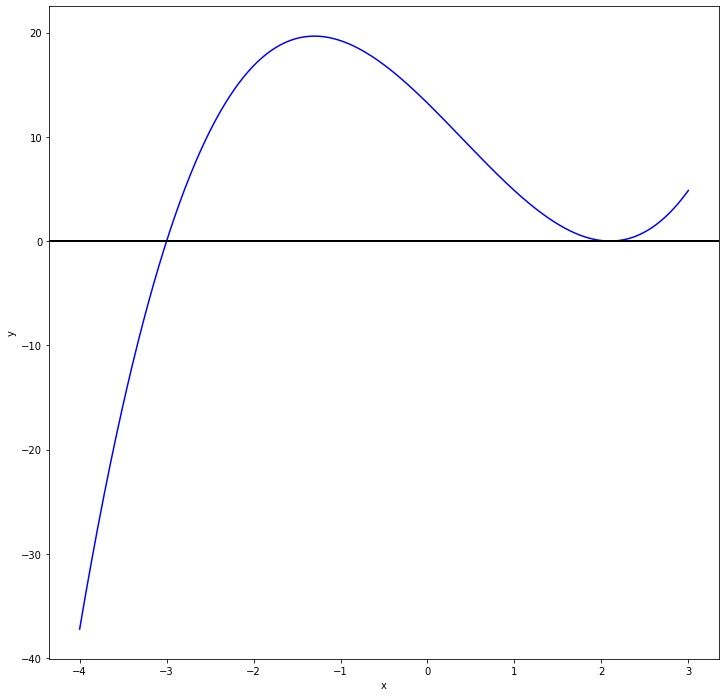

In [10]:
def f4(x): return x**3-1.2*x**2-8.19*x+13.23
def df4(x): return 3*x**2-2.4*x-8.19

fig, ax = plt.subplots(figsize=(12, 12))
VisualInspection(ax, f4, -4, 3, 0.01, color="blue", linestyle="-")

In [7]:
a = -4
b = 3
dx = 0.4


root=newtonRaphson(f4,df4,-4,-2)
print(root)

root=newtonRaphson(f4,df4,2,3)
print(root)
print('------------')
root=bisection(f4,-4,-2)
print(root)

root=bisection(f4,1,2.5)
print(root)

number of iteration 0
-3.0
number of iteration 25
2.099999997226891
------------
-3.0000000004656613
2.499999999650754


# Question 5

The major issue with NewtonRaphson is that the tangent can actually make the algorithm diverge (going further from the roots).

Try to make the algorithm more robust by combining it with the bisection algorithm to make sure we never go outside the root bracket

In [8]:
def newtonRaphson(f,df,a,b,tol=10**-9):
    #import error
    from numpy import sign
    
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    #if sign(fa) == sign(fb): error.err('Root is not bracketed')
    x = 0.5*(a+b)
    
    for i in range(30):
        fx = f(x)
        if fx == 0.0: return x
        #Tighten the brackets on the root
        if sign(fa) != sign(fx): b = x
        else: a = x
        #Try a Netwton-Raphson step
        dfx = df(x)
        try: dx = -fx/dfx
        except ZeroDivisionError: dx = b - a
        x = x + dx
        #If the result is outside the brackets, use bisection
        if (b-x)*(x-a) < 0.0:
            dx = 0.5*(b-a)
            x = a + dx
        if abs(dx) < tol*max(abs(b),1.0): return x
    print('Too many iterations in Newton-Raphoson')

-3.045009359732806


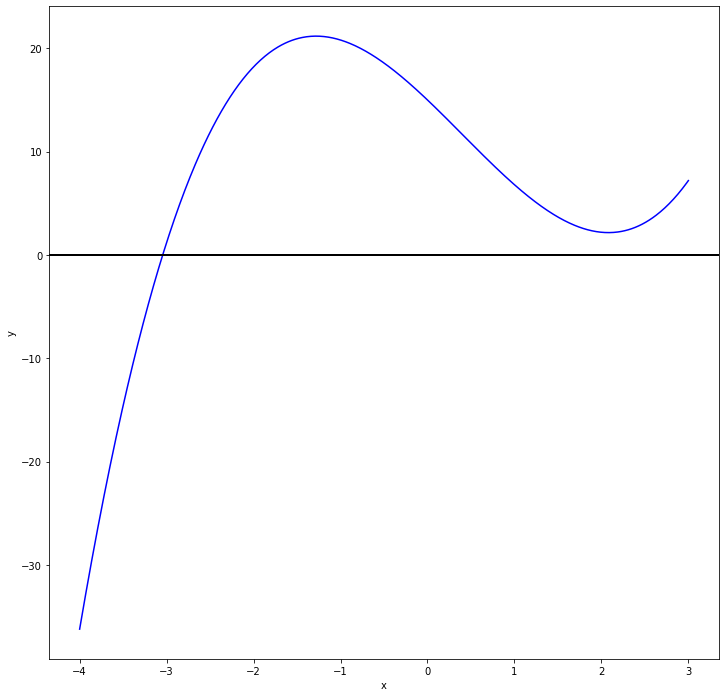

In [9]:
def f4(x): return x**3-1.2*x**2-8*x+15
def df4(x): return 3*x**2-2.4*x-8

fig, ax = plt.subplots(figsize=(12, 12))
VisualInspection(ax, f4, -4, 3, 0.01, color="blue", linestyle="-")


root=newtonRaphson(f4,df4,-4,3)
print(root)